# This notebook is used for show some statistic of BVDLTW data

In [5]:
import os
import sys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
from PIL import Image
import glob

In [26]:
path = './../../Datasets/BVDLTW/data_raw/'
train_path = path + 'train/raw/'
test_path = path + 'test/raw/'
total_path = path + 'all/raw'

annotations = {14: "Vảy nến đỏ da toàn thân",
               12: "Vảy nến thông thường",
               13: "Vảy nến thể mủ",
               40: "Viêm da cơ địa bán cấp",
               43: "Viêm da cơ địa mạn tính",
               44: "Ung thư da tế bào đáy",
               45: "Ung thư da tế bào vảy",
               46: "Bệnh da khác",
               60: "Da không bị bệnh",
               4: "Ung thư hắc tố",
               3: "Viêm da cơ địa cấp tính",
               107: "Viêm da tiếp xúc dị ứng",
               109: "Viêm da ứ trệ",
               101: "Nấm sâu",
               102: "Lao da",
               103: "Dày sừng da dầu",
               104: "Vảy phấn hồng",
               105: "Vảy phấn đỏ nang lông",
               106: "Viêm da dầu",
               }




Class Viêm da tiếp xúc dị ứng: 3210 images
Class Vảy phấn đỏ nang lông: 1204 images
Class Bệnh da khác: 1195 images
Class Viêm da dầu: 2747 images
Class Dày sừng da dầu: 1267 images
Class Vảy phấn hồng: 1329 images
Class Viêm da ứ trệ: 1118 images
Class Ung thư da tế bào vảy: 1355 images
Class Lao da: 1051 images
Class Nấm sâu: 1135 images
Class Viêm da cơ địa mạn tính: 5146 images
Class Ung thư da tế bào đáy: 1791 images
Class Viêm da cơ địa cấp tính: 4793 images
Class Vảy nến thể mủ: 3555 images
Class Viêm da cơ địa bán cấp: 4336 images
Class Vảy nến đỏ da toàn thân: 2876 images
Class Ung thư hắc tố: 615 images
Class Vảy nến thông thường: 5381 images
Class Da không bị bệnh: 3084 images
Class Viêm da tiếp xúc dị ứng: 479 images
Class Vảy phấn đỏ nang lông: 103 images
Class Bệnh da khác: 45 images
Class Viêm da dầu: 295 images
Class Dày sừng da dầu: 218 images
Class Vảy phấn hồng: 44 images
Class Viêm da ứ trệ: 134 images
Class Ung thư da tế bào vảy: 151 images
Class Lao da: 118 images

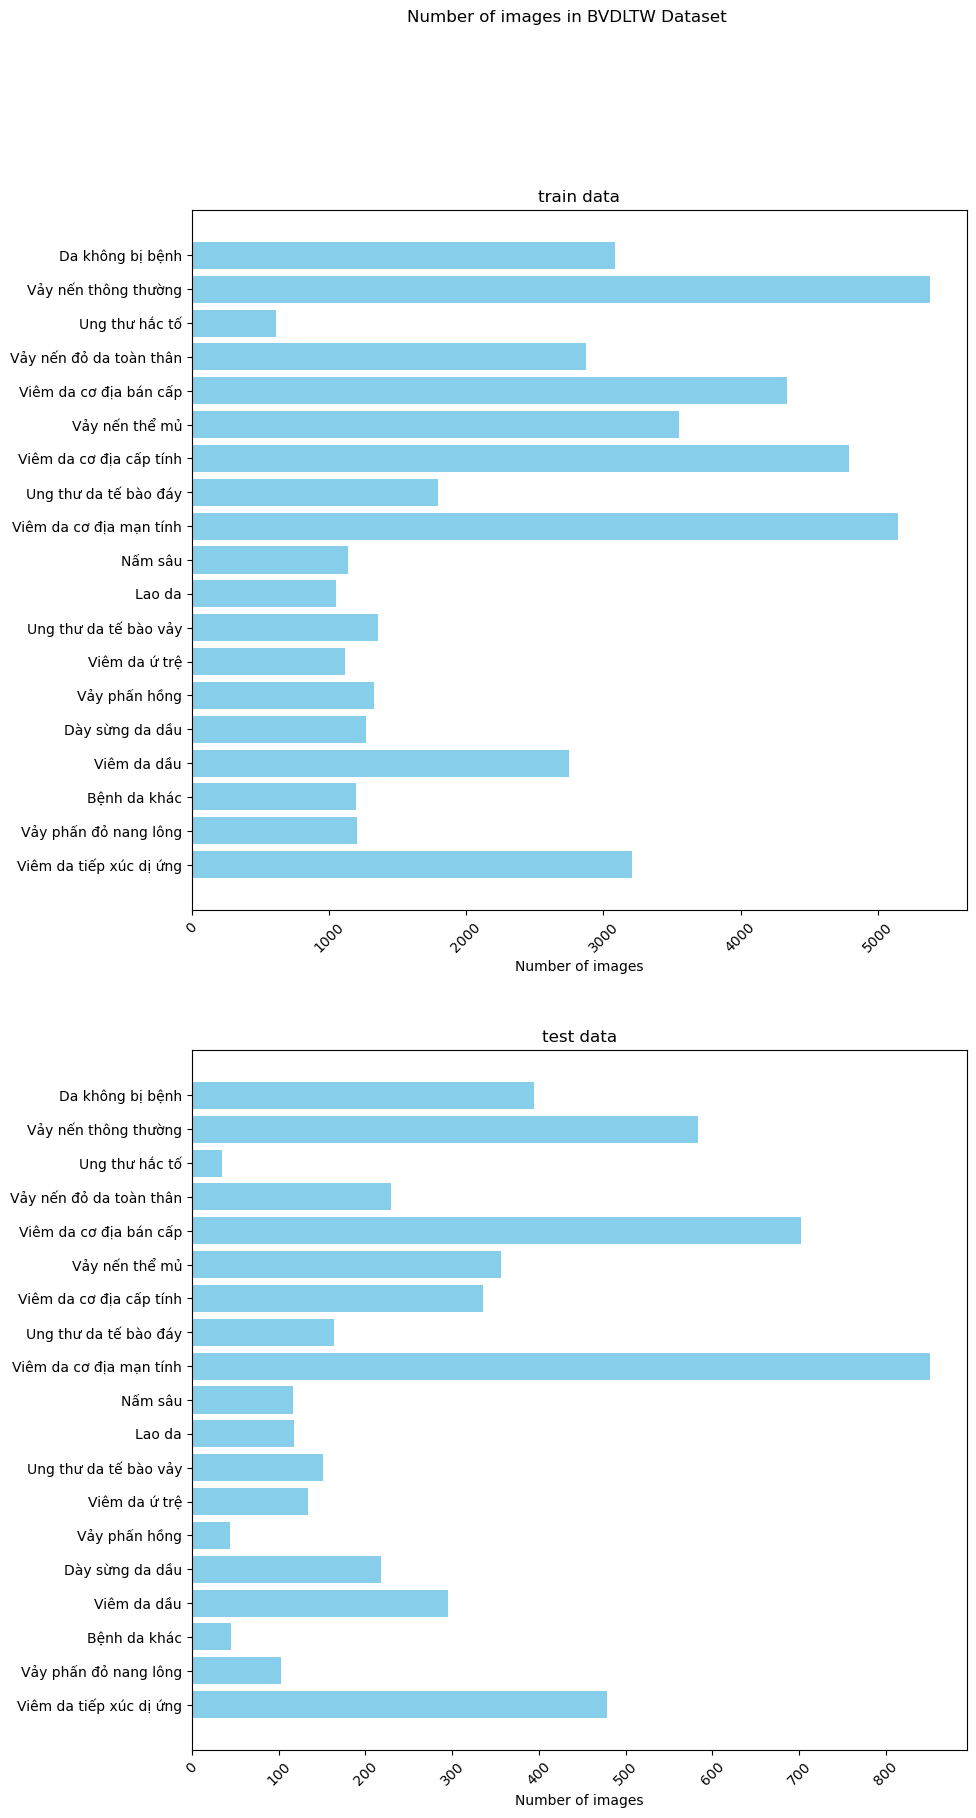

In [35]:
plt.figure(figsize=(10, 20))

for i,data_path in enumerate([train_path,test_path]):
    # create plot for each data_path
    categories = []
    values = []
        
    plt.subplot(2,1,i+1)
    plt.title(f"{data_path.split('/')[-3]} data")
    classes = os.listdir(data_path)
    for class_id in classes:
        categories.append(annotations[int(class_id)])
        class_path = os.path.join(data_path, class_id)
        quantity = len(os.listdir(class_path))
        values.append(quantity)
        print(f"Class {annotations[int(class_id)]}: {quantity} images")
        
    # plot bar chart
    plt.barh(categories, values, color='skyblue')
    # plt.gca().yaxis.set_visible(False)
    plt.xlabel('Number of images')
    
    # plt.ylabel('Classes')
    plt.xticks(rotation=45)
    # plt.grid(axis='x')
plt.suptitle('Number of images in BVDLTW Dataset')
# plt.tight_layout()
# plt.subplots_adjust(top=0.85)
plt.show()
        
        
        
    
    

Class Viêm da tiếp xúc dị ứng: Train - 3210 images, Test - 479 images
Class Vảy phấn đỏ nang lông: Train - 1204 images, Test - 103 images
Class Bệnh da khác: Train - 1195 images, Test - 45 images
Class Viêm da dầu: Train - 2747 images, Test - 295 images
Class Dày sừng da dầu: Train - 1267 images, Test - 218 images
Class Vảy phấn hồng: Train - 1329 images, Test - 44 images
Class Viêm da ứ trệ: Train - 1118 images, Test - 134 images
Class Ung thư da tế bào vảy: Train - 1355 images, Test - 151 images
Class Lao da: Train - 1051 images, Test - 118 images
Class Nấm sâu: Train - 1135 images, Test - 117 images
Class Viêm da cơ địa mạn tính: Train - 5146 images, Test - 851 images
Class Ung thư da tế bào đáy: Train - 1791 images, Test - 164 images
Class Viêm da cơ địa cấp tính: Train - 4793 images, Test - 336 images
Class Vảy nến thể mủ: Train - 3555 images, Test - 356 images
Class Viêm da cơ địa bán cấp: Train - 4336 images, Test - 702 images
Class Vảy nến đỏ da toàn thân: Train - 2876 images, 

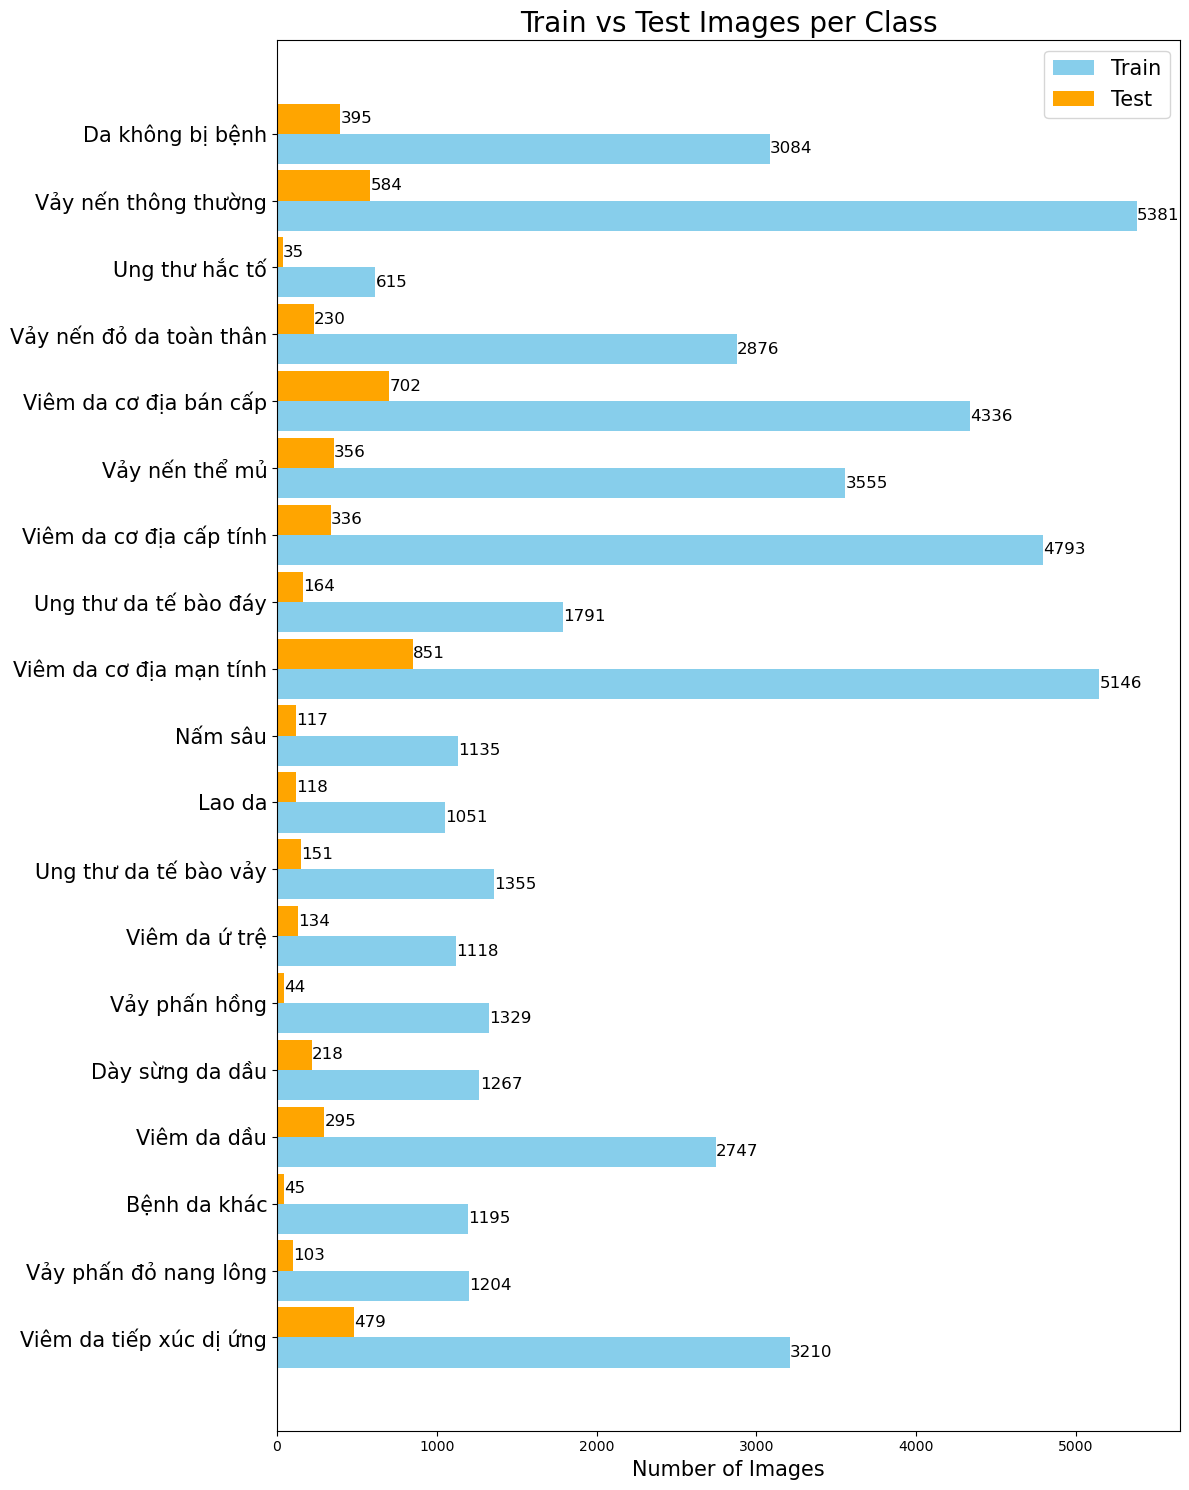

In [3]:

plt.figure(figsize=(12, 15))

categories = []
train_values = []
test_values = []

# Get the categories and their corresponding counts for train and test
classes = os.listdir(train_path)  # Assuming both paths have the same class structure

for class_id in classes:
    # Append the category name
    categories.append(annotations[int(class_id)])
    
    # Count the images in the train and test paths for each class
    train_class_path = os.path.join(train_path, class_id)
    test_class_path = os.path.join(test_path, class_id)
    
    train_quantity = len(os.listdir(train_class_path))
    test_quantity = len(os.listdir(test_class_path))
    
    # Append the values to the lists
    train_values.append(train_quantity)
    test_values.append(test_quantity)
    
    print(f"Class {annotations[int(class_id)]}: Train - {train_quantity} images, Test - {test_quantity} images")

# Set positions for each bar group (train, test)
ind = np.arange(len(categories))  # y positions for categories
width = 0.45  # width of the bars

# Create a horizontal grouped bar plot (train vs test for each category)
bars_train = plt.barh(ind - width/2, train_values, width, label='Train', color='skyblue')
bars_test = plt.barh(ind + width/2, test_values, width, label='Test', color='orange')

# Add labels, title, and grid
# plt.ylabel('Classes',fontsize=15)
plt.xlabel('Number of Images',fontsize=15)
plt.title('Train vs Test Images per Class',fontsize=20)
plt.yticks(ind, categories, fontsize=15)  # Set categories as y-tick labels
plt.legend(fontsize=15)

# Add the numbers to the right of the bars
for bar in bars_train:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, 
             str(bar.get_width()), va='center', ha='left', fontsize=12)

for bar in bars_test:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, 
             str(bar.get_width()), va='center', ha='left', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Create a piechart for number of images in each classes, for total BVDLTW data

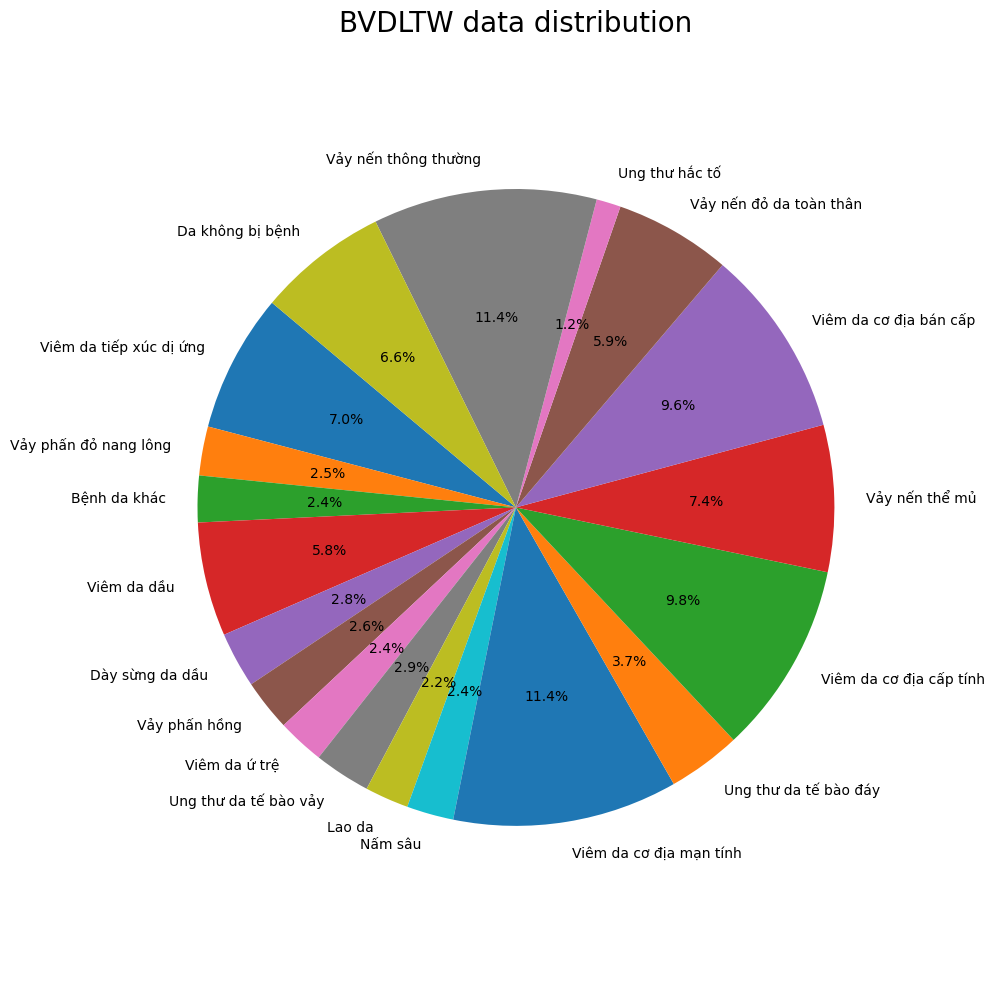

In [6]:
dataset_path = total_path


# Prepare lists for labels and counts
class_labels = []
image_counts = []

for class_id in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_id)
    if os.path.isdir(class_path):
        try:
            label = annotations[int(class_id)]  # Get Vietnamese label
        except KeyError:
            label = f"Lớp {class_id}"  # Fallback if not in annotations

        count = len(os.listdir(class_path))
        class_labels.append(label)
        image_counts.append(count)

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(image_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.title("BVDLTW data distribution", fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Piechart for Cancer classes only

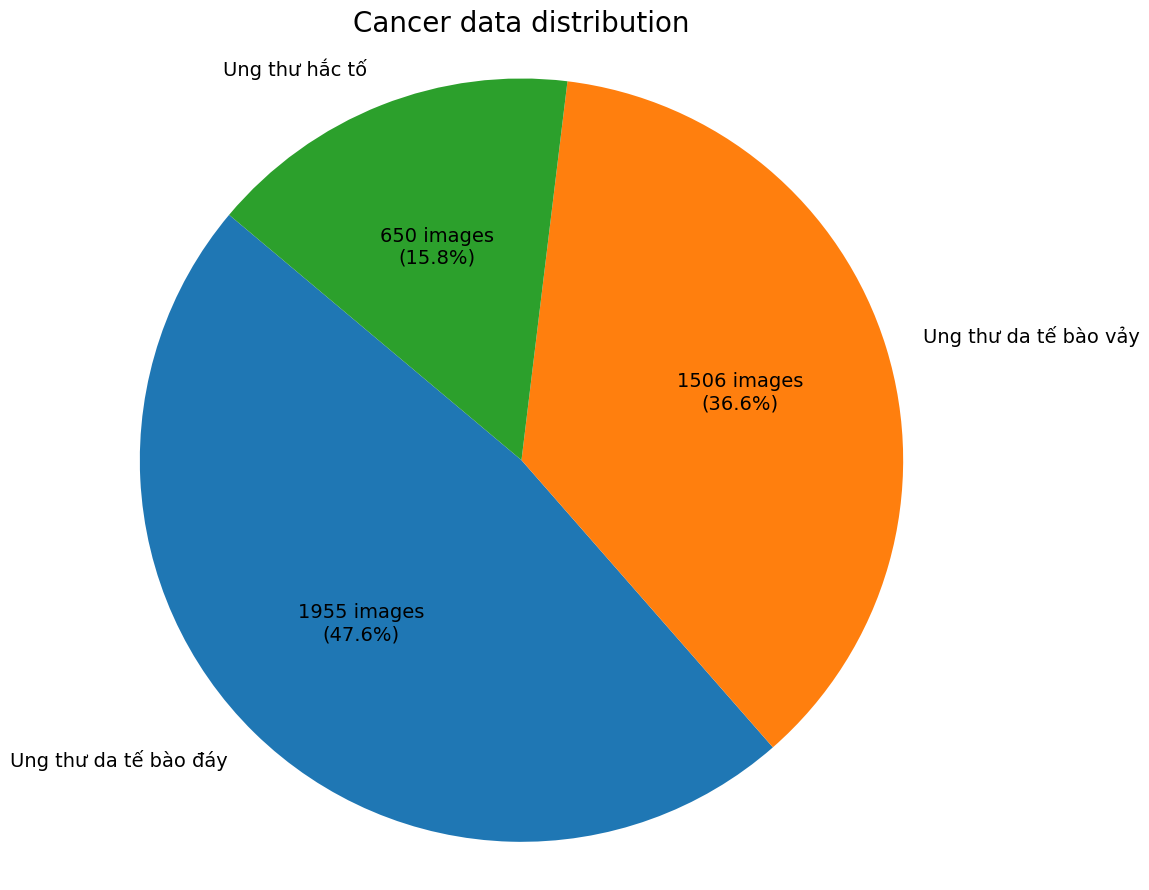

In [22]:

# Target classes to include
target_classes = [44, 45, 4]

# Prepare data
class_labels = []
image_counts = []

for class_id in target_classes:
    class_folder = str(class_id)
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path):
        count = len(os.listdir(class_path))
        label = annotations.get(class_id, f"Lớp {class_id}")
        class_labels.append(label)
        image_counts.append(count)

# Define custom autopct function
def autopct_format(pct, allvals):
    total = sum(allvals)
    count = int(round(pct * total / 100.0))
    return f'{count} images\n({pct:.1f}%)'

# Plot pie chart
plt.figure(figsize=(11, 9))
plt.pie(image_counts, labels=class_labels, autopct=lambda pct: autopct_format(pct, image_counts), startangle=140, textprops={'fontsize': 14})
plt.title("Cancer data distribution", fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

## Visualize some cancer samples

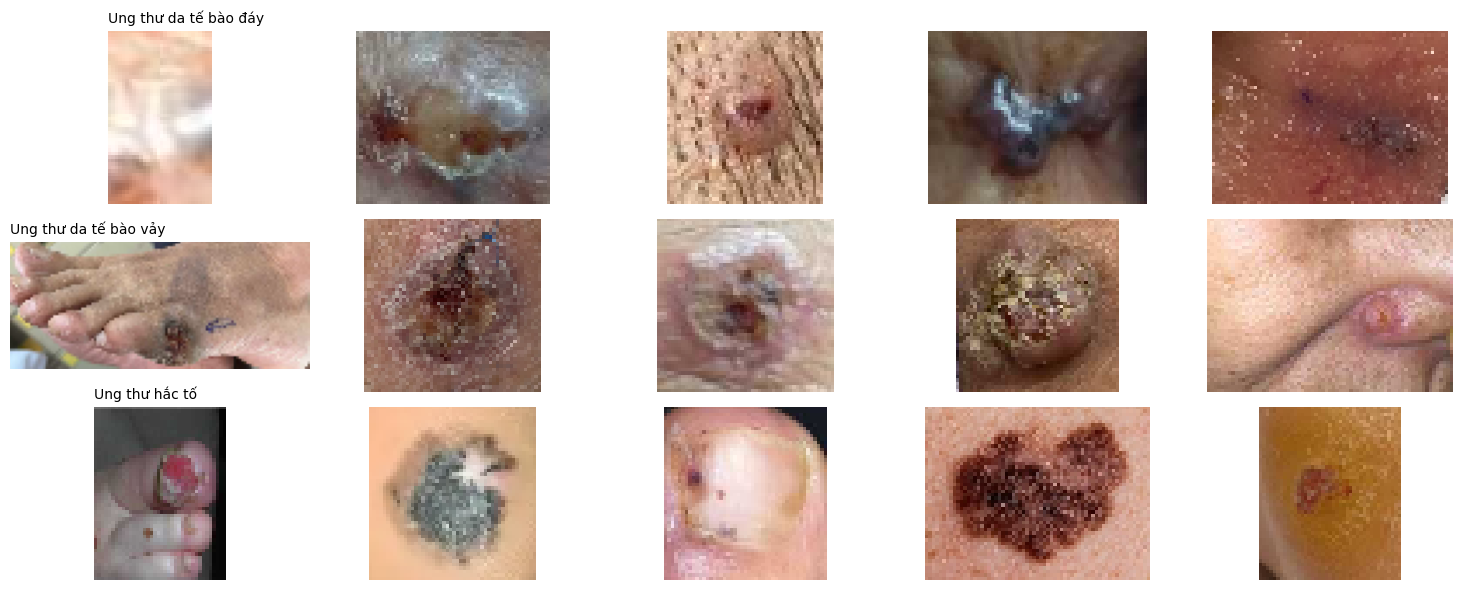

In [46]:
import random
dataset_path = total_path
target_classes = [44, 45, 4]


samples_per_class = 5  # Images per class
fixed_height = 50      # Resize all images to this height

# Set random seed (change or remove this line if you want full randomness each time)
random.seed(42)

# Prepare grid
fig, axes = plt.subplots(len(target_classes), samples_per_class, figsize=(samples_per_class * 3, len(target_classes) * 2))

for row_idx, class_id in enumerate(target_classes):
    class_name = annotations[class_id]
    class_folder = os.path.join(dataset_path, str(class_id))

    # Filter valid image files
    image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(image_files)  # 👈 Shuffle randomly
    image_files = image_files[:samples_per_class]

    for col_idx in range(samples_per_class):
        ax = axes[row_idx][col_idx] if len(target_classes) > 1 else axes[col_idx]
        ax.axis('off')

        if col_idx < len(image_files):
            img_path = os.path.join(class_folder, image_files[col_idx])
            img = cv2.imread(img_path)
            if img is None:
                continue

            # Resize to fixed height, preserve aspect ratio
            h, w = img.shape[:2]
            aspect_ratio = w / h
            new_width = int(fixed_height * aspect_ratio)
            resized_img = cv2.resize(img, (new_width, fixed_height))
            resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

            ax.imshow(resized_img)
            ax.set_title(class_name if col_idx == 0 else "", fontsize=10, loc='left')

plt.tight_layout()
plt.show()